**In this notebook, we will try a few Deep Neural Network models and see if we can beat the score of our Baseline model. Remember our Baseline model gave us an MAE of 21k, we are trying to beat that.**

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('PreprocessedDataset.csv')

In [8]:
df.shape

(1460, 77)

In [9]:
df.head(5)

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,3,1,3,3,0,4,0,5,2,...,0,61,0,0,0,0,0,2,2008,208500
1,2,3,1,3,3,0,2,0,24,1,...,298,0,0,0,0,0,0,5,2007,181500
2,3,3,1,0,3,0,4,0,5,2,...,0,42,0,0,0,0,0,9,2008,223500
3,4,3,1,0,3,0,0,0,6,2,...,0,35,272,0,0,0,0,2,2006,140000
4,5,3,1,0,3,0,2,0,15,2,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
Id_column = df.pop('Id')

In [11]:
df.shape

(1460, 76)

In [12]:
#Seperating features and labels
X = df.iloc[:, :75].values
y = df.iloc[:, -1].values

In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [15]:
#Splittilng the data set into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

#Model 1

In [16]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
normalizer.adapt(np.array(X_train))

In [37]:
model_1 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(1, activation="ReLU")
])

In [38]:
model_1.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam())

In [39]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 75)               151       
 n)                                                              
                                                                 
 dense_35 (Dense)            (None, 1)                 76        
                                                                 
Total params: 227
Trainable params: 76
Non-trainable params: 151
_________________________________________________________________


In [40]:
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging using verbose=0 else don't use it at all.
    verbose=0,
    validation_split = 0.2
)

In [41]:
y_pred_model_1 = model_1.predict(X_test).flatten()

In [42]:
from sklearn.metrics import mean_absolute_error
  
# Calculation of Mean Squared Error (MSE)
model_1_mae = mean_absolute_error(y_test,y_pred_model_1)

In [43]:
print("The mean absolute error of our Model 1 with only 1 hidden layer is: {:.2f}".format(model_1_mae))

The mean absolute error of our Model 1 with only 1 hidden layer is: 182219.77


#Model 2

In [18]:
model_2 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

In [19]:
model_2.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.001))

In [20]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 75)               151       
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                4864      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,240
Trainable params: 9,089
Non-trainable params: 151
_________________________________________________________________


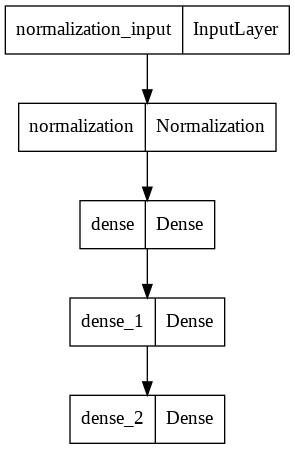

In [21]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_2)

In [22]:
history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging using verbose=0 else don't use it at all.
    verbose=0,
    validation_split = 0.2
)

In [23]:
y_pred_model_2 = model_2.predict(X_test).flatten()

In [25]:
from sklearn.metrics import mean_absolute_error

model_2_mae = mean_absolute_error(y_test, y_pred_model_2)

In [26]:
print("The mean absolute error of our Model 2 with only 3 hidden layers is: {:.2f}".format(model_2_mae))

The mean absolute error of our Model 2 with only 3 hidden layers is: 41176.75


# Model 3

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
history_3 = model_3.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            validation_split=0.2)

In [45]:
y_pred_model_3 = model_3.predict(X_test).flatten()

In [46]:
model_3_mae = mean_absolute_error(y_test, y_pred_model_3)

In [47]:
print("The mean absolute error of our Model 3 with 1 hidden layer is: {:.2f}".format(model_3_mae))

The mean absolute error of our Model 3 with 1 hidden layer is: 787352.38


#Model 4

In [48]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_4 = tf.keras.Sequential([
                               normalizer,
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_4 = model_4.fit(X_train, y_train, epochs=200, verbose=0) 

In [49]:
y_pred_model_4 = model_3.predict(X_test).flatten()

In [50]:
model_4_mae = mean_absolute_error(y_test, y_pred_model_4)

In [51]:
print("The mean absolute error of our Model 4 with 3 hidden layer is: {:.2f}".format(model_4_mae))

The mean absolute error of our Model 4 with 3 hidden layer is: 787352.38


# Plotting and evaluating all 4 models.

Text(0.5, 0, 'epochs')

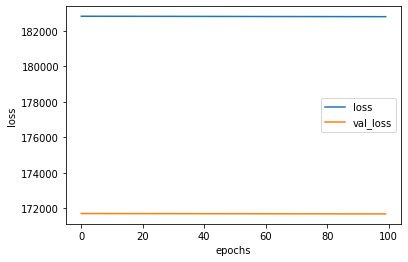

In [ ]:
#Model_1
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

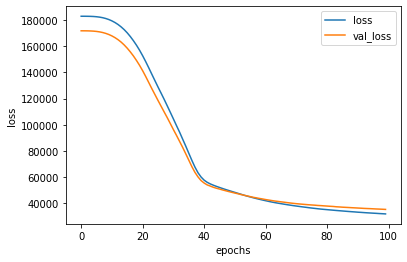

In [ ]:
#Model_2
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

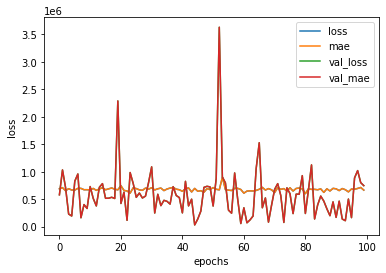

In [ ]:
#Model_3
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

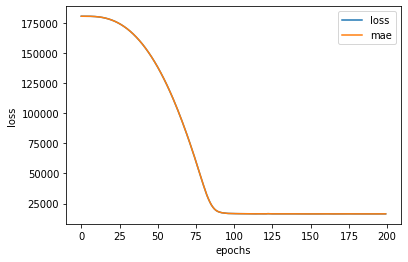

In [ ]:
#Model_4
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model_1_mae,model_2_mae, model_3_mae, model_4_mae

(182219.93434674936, 40414.54086345516, 787352.3796018836, 787352.3796018836)

**So our model_2 performed the best and came relatively close to the mae of our linear regression model we used in the previous notebook, in the next module we will try to tweak that model and try if we can achieve better results.**

# Tweaking our best model yet.

In [27]:
# We will try a model with one extra layer, reduce the learning rate and train for longer.

model_5 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_5.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.0001))

history_5 = model_5.fit(
    X_train,
    y_train,
    epochs=1000,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_5 = model_5.predict(X_test).flatten()

model_5_mae = mean_absolute_error(y_test, y_pred_model_5)

print("The mean absolute error of our Model 5 is: {:.2f}".format(model_5_mae))

The mean absolute error of our Model 5 is: 24539.54


Wohoo we are close, let's see if reducing the learning rate alone can get us where we want to be and keep the epochs to 200 as the model 2.

In [29]:
# We will try a model with reduced learning rate
model_6 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_6.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.0001))

history_6 = model_6.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_6 = model_6.predict(X_test).flatten()

model_6_mae = mean_absolute_error(y_test, y_pred_model_6)

print("The mean absolute error of our Model 6 is: {:.2f}".format(model_6_mae))

The mean absolute error of our Model 6 is: 47251.68


Reucing the learning rate didn't help us much, how about increasing it?

In [30]:
# We will try a model with increased learning rate
model_7 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_7.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.1))

history_7 = model_7.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_7 = model_7.predict(X_test).flatten()

model_7_mae = mean_absolute_error(y_test, y_pred_model_7)

print("The mean absolute error of our Model 7 is: {:.2f}".format(model_7_mae))

The mean absolute error of our Model 7 is: 24445.57


Alright seems like increasing it helped us, how about increasing it further?

In [31]:
# We will try a model with increased learning rate
model_8 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_8.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(1))

history_8 = model_8.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_8 = model_8.predict(X_test).flatten()

model_8_mae = mean_absolute_error(y_test, y_pred_model_8)

print("The mean absolute error of our Model 8 is: {:.2f}".format(model_8_mae))

The mean absolute error of our Model 8 is: 55338.33


Ok that's weird, let's train our model 7 for longer shall we?

In [32]:
# We will try a model with increased learning rate
model_9 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_9.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.1))

history_9 = model_9.fit(
    X_train,
    y_train,
    epochs=1200,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_9 = model_9.predict(X_test).flatten()

model_9_mae = mean_absolute_error(y_test, y_pred_model_9)

print("The mean absolute error of our Model 9 is: {:.2f}".format(model_9_mae))

The mean absolute error of our Model 9 is: 25548.33


Well, not much changed, how about taking a big leap and train our model 5 for 2000 epochs?

In [33]:
# We will try a model with one extra layer, reduce the learning rate and train for longer.

model_10 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_10.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.0001))

history_10 = model_10.fit(
    X_train,
    y_train,
    epochs=2000,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_10 = model_10.predict(X_test).flatten()

model_10_mae = mean_absolute_error(y_test, y_pred_model_10)

print("The mean absolute error of our Model 10 is: {:.2f}".format(model_10_mae))

The mean absolute error of our Model 10 is: 21742.39


Bravo, our model has come so close to beating the baseline, we will take an even bigger leap and this time train it for 5000 epochs.

In [34]:
# We will try a model with one extra layer, reduce the learning rate and train for longer.
%%time
model_11 = tf.keras.models.Sequential([
                                      normalizer,
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(64, activation="ReLU"),
                                      tf.keras.layers.Dense(1)
])

model_11.compile(loss="mean_absolute_error",
                optimizer=tf.keras.optimizers.Adam(0.0001))

history_11 = model_11.fit(
    X_train,
    y_train,
    epochs=5000,
    verbose=0,
    validation_split = 0.2
)

y_pred_model_11 = model_11.predict(X_test).flatten()

model_11_mae = mean_absolute_error(y_test, y_pred_model_11)

print("The mean absolute error of our Model 11 is: {:.2f}".format(model_11_mae))

The mean absolute error of our Model 11 is: 21253.50
CPU times: user 8min 38s, sys: 32.6 s, total: 9min 11s
Wall time: 7min 31s


**Alright so our model didn't do much better even tho we trained it for a lot longer. No problem, we did beat our Baseline Scikit Learn model's MAE by around 500.**

**Our Scikit Learn Model had an MAE of 21704 and our model 11 of Deep Learning experimentations has an MAE of 21253.**

In [35]:
21704-21253

451

# Evaluating all our models

**So our deep learning model beat our Baseline by 453. Let's see if any of our other deep learning models beat our baseline or not.**

In [72]:
Model_Scores = {
    "Baseline SkLearn Model MAE" : 21704,
    "Model_1_mae" : model_1_mae,
    "Model_2_mae" : model_2_mae,
    "Model_3_mae" : model_3_mae,
    "Model_4_mae" : model_4_mae,
    "Model_5_mae" : model_5_mae,
    "Model_6_mae" : model_6_mae,
    "Model_7_mae" : model_7_mae,
    "Model_8_mae" : model_8_mae,
    "Model_9_mae" : model_9_mae,
    "Model_10_mae" : model_10_mae,
    "Model_11_mae" : model_11_mae
}

In [73]:
Models = pd.DataFrame(Model_Scores.items())

Models

,0,1
0,Baseline SkLearn Model MAE,21704.000000
1,Model_1_mae,182219.768498
2,Model_2_mae,41176.750042
3,Model_3_mae,787352.379602
4,Model_4_mae,787352.379602
5,Model_5_mae,24539.544066
6,Model_6_mae,47251.681815
7,Model_7_mae,24445.571811
8,Model_8_mae,55338.329195
9,Model_9_mae,25548.333142


In [76]:
#Check if any value is lesser than our baseline result.
for values in Models[1]:
    if values<21704:
        print(values)

21253.49535798373


In [77]:
#CHeck the model name
Models.loc[Models[1] <21704]

,0,1
11,Model_11_mae,21253.495358


**So out of all our models, model 11 performed the best.**

# Visualizing our best model yet

Text(0.5, 0, 'epochs')

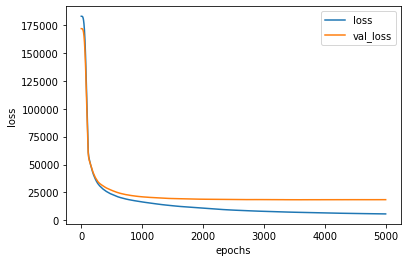

In [79]:
#Model_11
pd.DataFrame(history_11.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**See, with the help of deep learning we have defeated a linear regression model, this graph shows how gradually the loss decreased.**